In [1]:
from field_of_view import FieldOfView
from clusters import ClusterParam

Loading Homer Centers...
Loading Life Act...
Loading GluA1...
Loading GluA2...
Setting up Thresholding...
LifeAct Shape is: (2560, 2560)
(1, 512, 512, 1)
1/1 [==============================] - 2s 2s/step


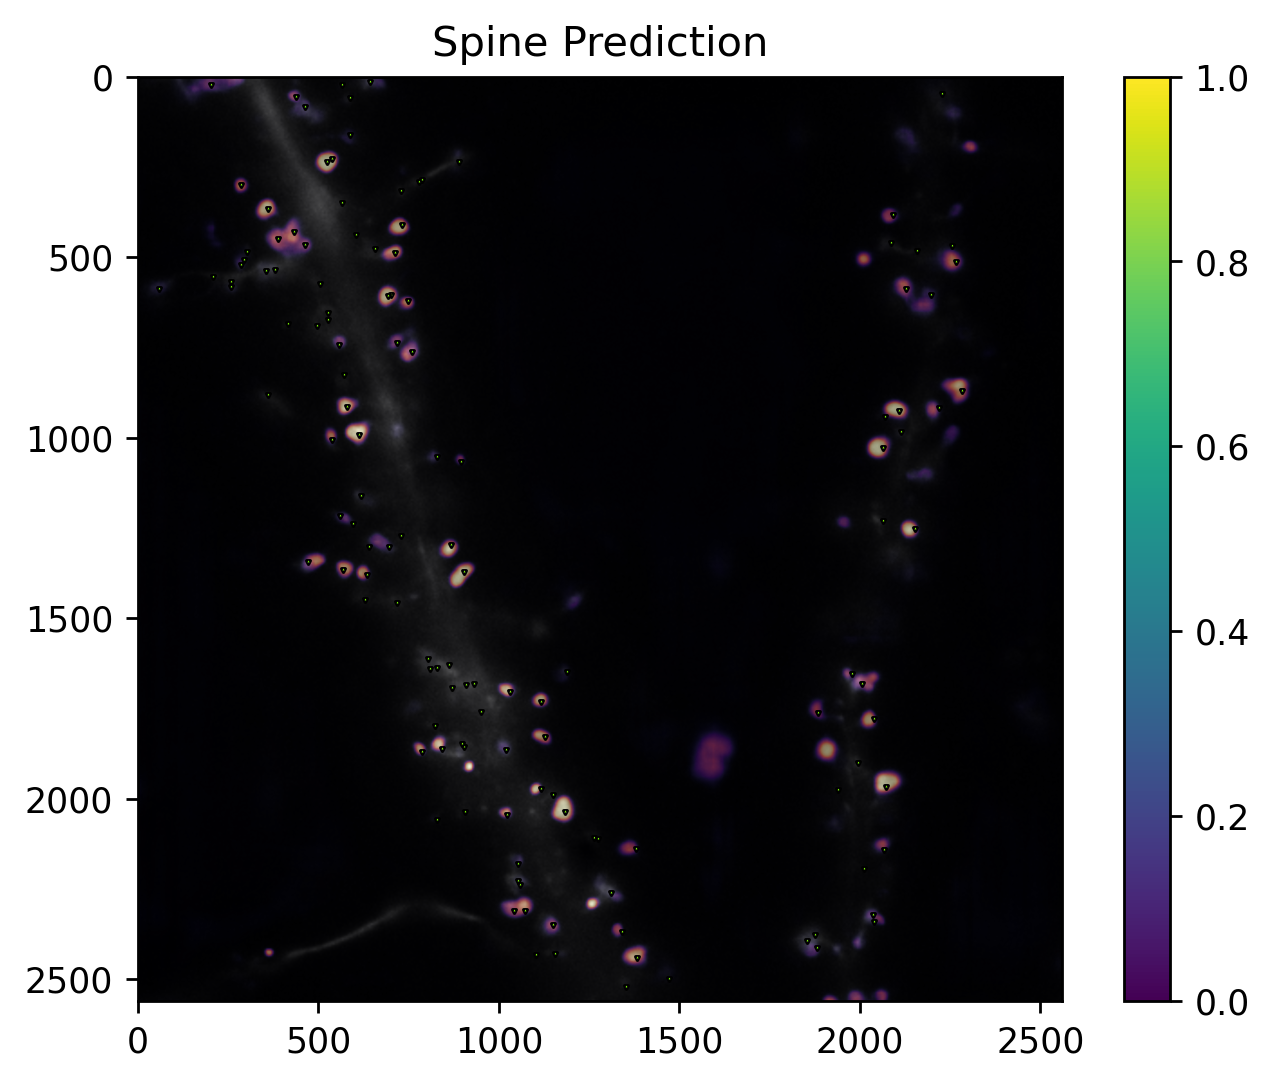

Finding Clusters for: GluA1(eps=25, min_samples=25)
Found 231 Clusters


In [2]:
nm_per_pixel = 21.34
time_per_frame = 0.1
Tau_D_GluA1 = 152.32
Tau_D_GluA2 = 97
background_threshold = 500
homer_path = '../Examples/A1_aHomer_corrected.csv'
life_act_path = '../Examples/A1_Composite.tif'
deepd3_path = 'DeepD3_32F.h5'
points = [['GluA1', r'../Examples/A1_GluA1_corrected.csv', 'white', time_per_frame],
          ['GluA2', r'../Examples/A1_GluA2_corrected.csv', 'cyan', time_per_frame]]
# Params = [ClusterParam(25, 25, 'GluA1'),
#           ClusterParam(25, 50, 'GluA1'),
#           ClusterParam(25, 75, 'GluA1'),
#           ClusterParam(25, 100, 'GluA1'),
#           ClusterParam(25, 15, 'GluA2'),
#           ClusterParam(25, 25, 'GluA2'),
#           ClusterParam(25, 50, 'GluA2'),
#           ClusterParam(25, 75, 'GluA2'),]
Params = [ClusterParam(25, 25, 'GluA1')]

# Params = [ClusterParam(80, 25, 'GluA1')]
FOV_A = FieldOfView(homer_centers=homer_path, 
                    life_act=life_act_path, 
                    nm_per_pixel=nm_per_pixel,
                    points=points, 
                    Params=Params, 
                    threshold=background_threshold,
                    deepd3_model_path=deepd3_path)

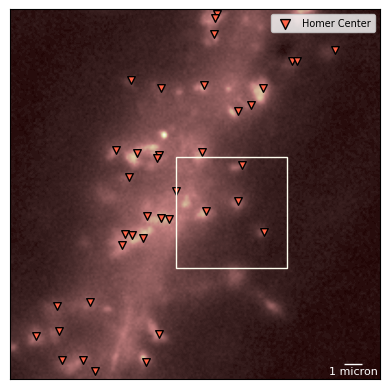

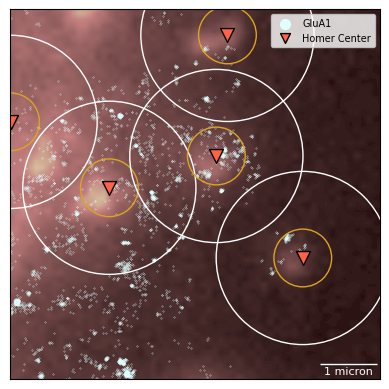

In [7]:
limits = [[500, 1500], [1250, 2250]]
box_limits = [[950, 1250], [1550, 1850]]
dpi = 100

FOV_A.plot_region(limits=limits, Params=[], circle_radii=[], ticks=False, homers=True, homer_size=30,
                  show_points=[], point_size=0.001, background_points_colors=['cyan', 'white'], 
                  circle_colors=['goldenrod', 'white'], background_cmap='pink', homer_color='tomato',
                  box_limits=box_limits, box_color='ivory', dpi=dpi)
FOV_A.plot_region(limits=box_limits, Params=[], circle_radii=[500, 1500], ticks=False, homers=True, dpi=dpi,
                  show_points=['GluA1'], point_size=0.05, background_points_colors=['lightcyan', 'white'],
                  circle_colors=['goldenrod', 'white'], background_cmap='pink', homer_color='tomato')

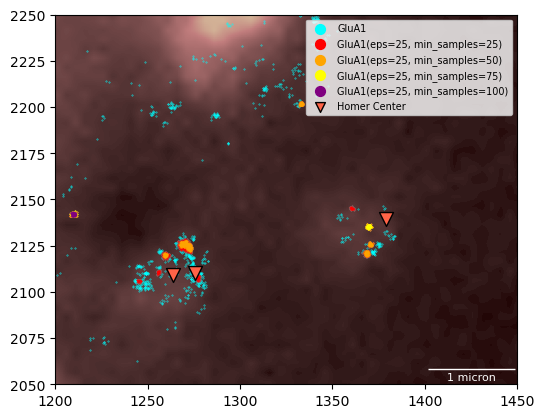

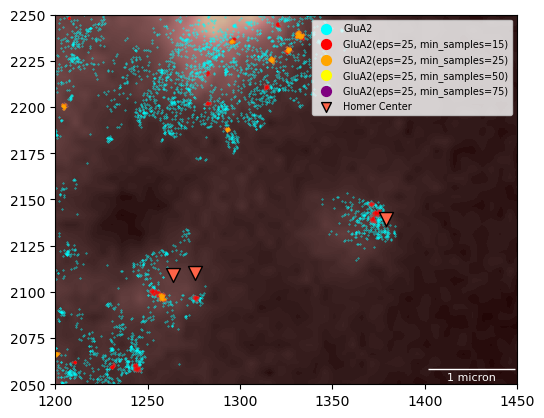

In [8]:
FOV_A.plot_region(limits=[[1200, 1450], [2050, 2250]], Params=Params[0:4], circle_radii=[], 
                  show_points=['GluA1'], point_size=0.1, background_points_colors=['cyan', 'white'], homers=True,
                  circle_colors=['goldenrod', 'white'], background_cmap='pink', homer_color='tomato', dpi=dpi)
FOV_A.plot_region(limits=[[1200, 1450], [2050, 2250]], Params=Params[4:8], circle_radii=[], 
                  show_points=['GluA2'], point_size=0.1, background_points_colors=['cyan', 'white'], homers=True,
                  circle_colors=['goldenrod', 'white'], background_cmap='pink', homer_color='tomato', dpi=dpi)

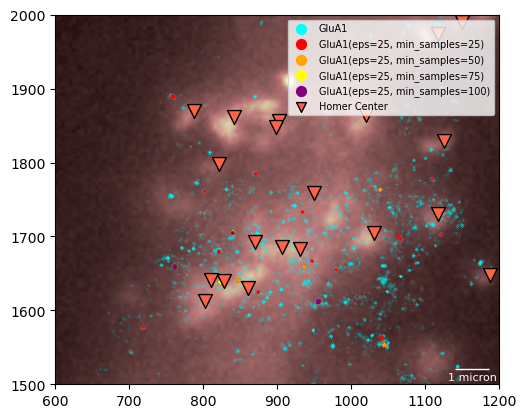

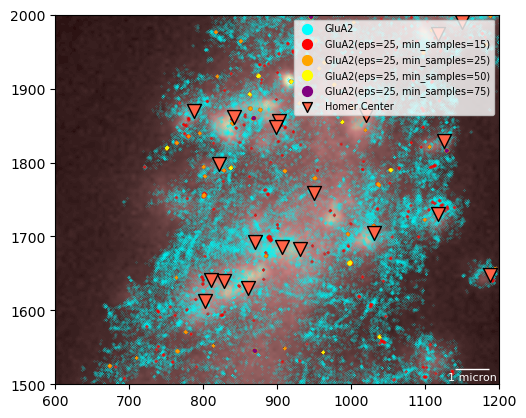

In [9]:
limits = [[600, 1200], [1500, 2000]]
FOV_A.plot_region(limits=limits, Params=Params[0:4], circle_radii=[], 
                  show_points=['GluA1'], point_size=0.01, background_points_colors=['cyan', 'white'], homers=True,
                  circle_colors=['goldenrod', 'white'], background_cmap='pink', homer_color='tomato', dpi=dpi)
FOV_A.plot_region(limits=limits, Params=Params[4:8], circle_radii=[], 
                  show_points=['GluA2'], point_size=0.01, background_points_colors=['cyan', 'white'], homers=True,
                  circle_colors=['goldenrod', 'white'], background_cmap='pink', homer_color='tomato', dpi=dpi)

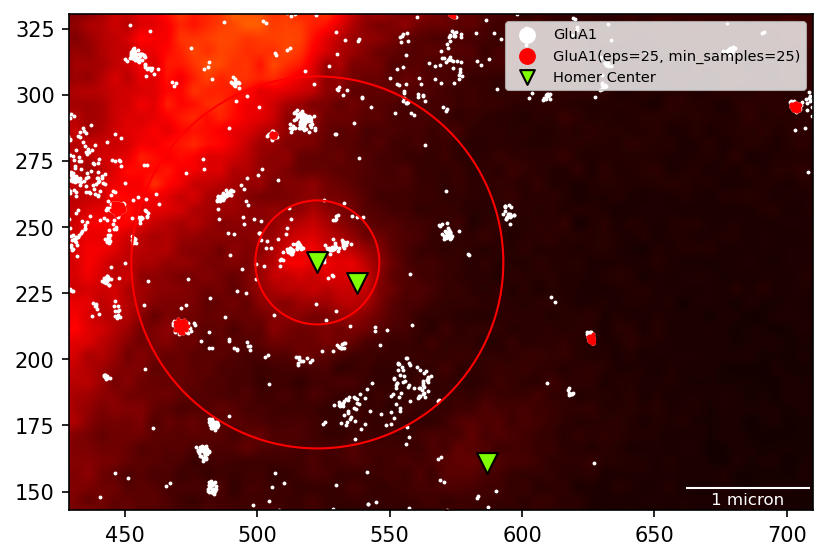

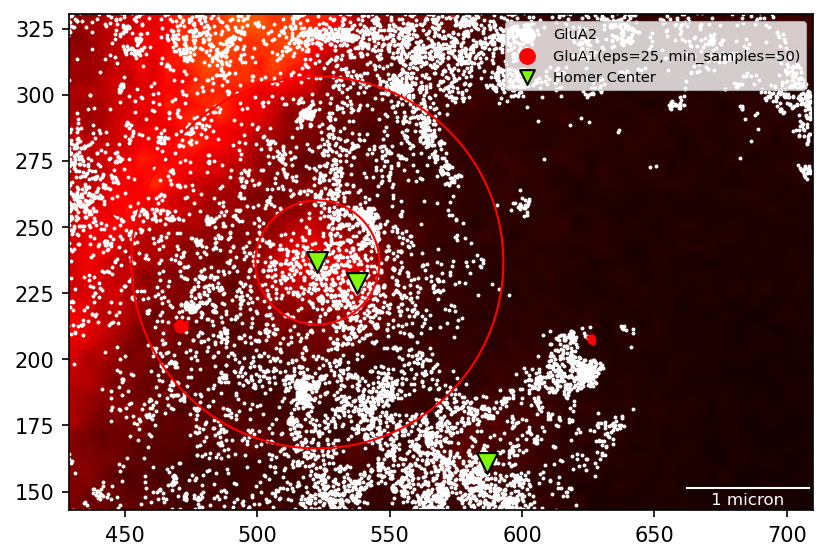

In [10]:
index = 15
FOV_A.plot_homer(index, Params=Params[0], circle_radii=[500, 1500], show_points=['GluA1'], 
                 other_homers=True)
FOV_A.plot_homer(index, Params=Params[1], circle_radii=[500, 1500], show_points=['GluA2'], 
                 other_homers=True)

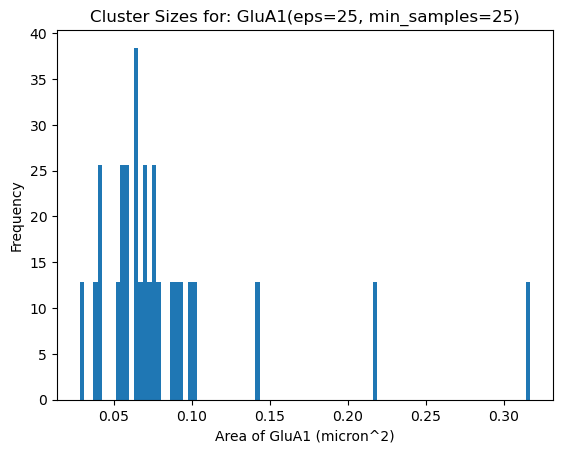

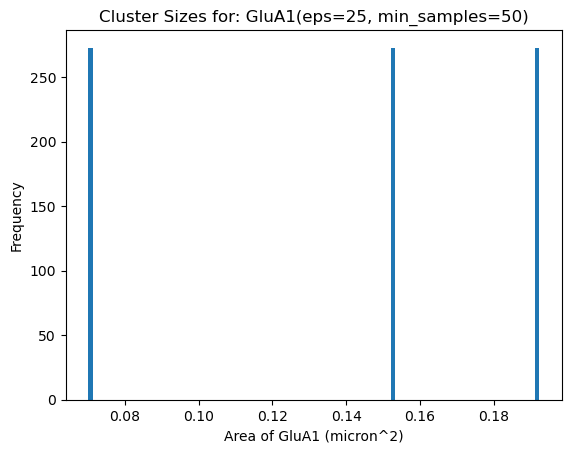

In [11]:
FOV_A.cluster_size_histogram(Tau_D=Tau_D_GluA1, Params=Params[0], bins=100, max_dark_time=500, area=True)
FOV_A.cluster_size_histogram(Tau_D=Tau_D_GluA2, Params=Params[1], bins=100, max_dark_time=200, area=True)

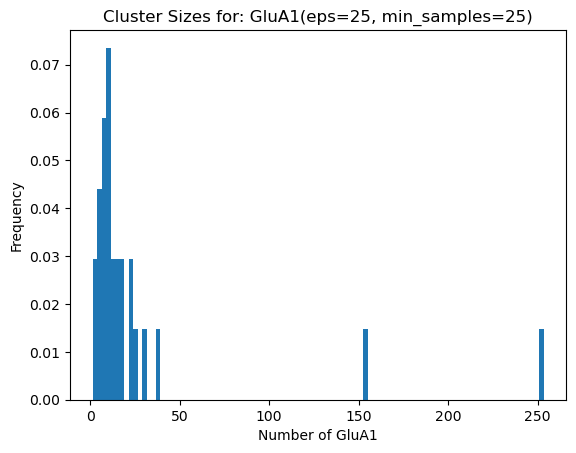

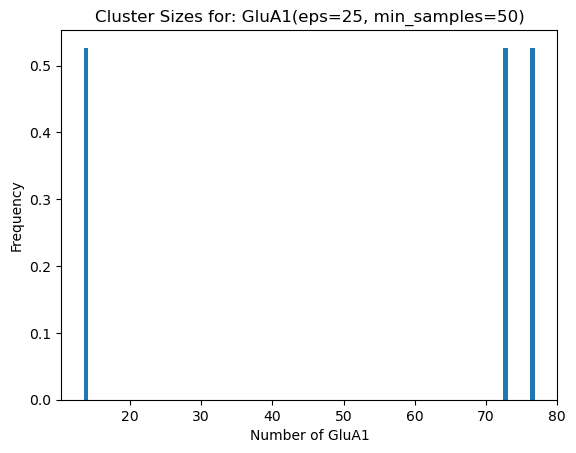

In [12]:
FOV_A.cluster_size_histogram(Tau_D=Tau_D_GluA1, Params=Params[0], bins=100, max_dark_time=500, area=False)
FOV_A.cluster_size_histogram(Tau_D=Tau_D_GluA2, Params=Params[1], bins=100, max_dark_time=200, area=False, plot_sizes_over=2000)

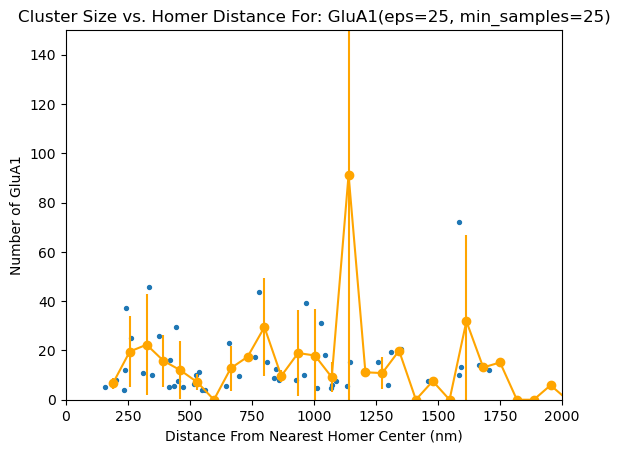

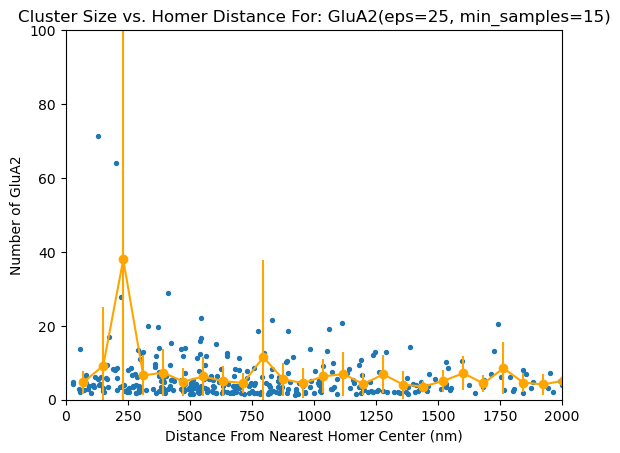

In [13]:
FOV_A.cluster_size_by_distance_to_homer_center(Tau_D_GluA1, Params=Params[0], num_bins=200, 
                                               area=False, y_top=150, max_dark_time=1000)
FOV_A.cluster_size_by_distance_to_homer_center(Tau_D_GluA2, Params=Params[4], num_bins=150, 
                                               area=False, y_top=100, max_dark_time=250)

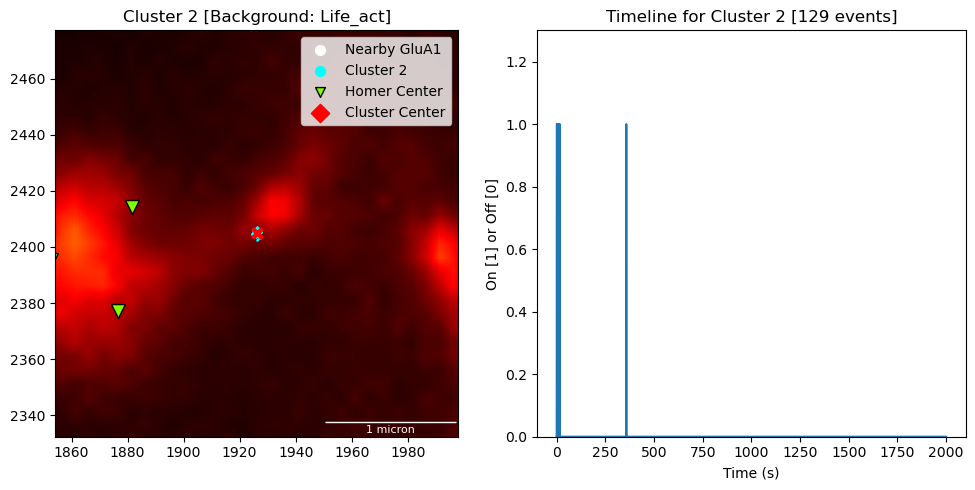

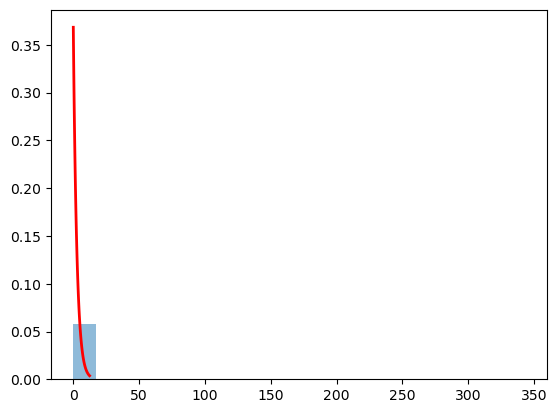

2.687500000000001

In [14]:
Param = Params[0]
cluster_index = 2
FOV_A.clustering_results[Param][cluster_index].plot(buffer=1500, nearby_points=True)
FOV_A.clustering_results[Param][cluster_index].frames.get_average_dark_time(plot=True)

In [4]:
FOV_A.write_clusters_to_csv(filename="Cluster.csv", Tau_D=97, 
                            Params=Params, max_dark_time=500)

Cluster.csv created successfully!


In [3]:
nm_per_pixel = 21.34
time_per_frame = 0.1
background_threshold = 500
homer_path = '../Examples/B1_aHomer_corrected.csv'
life_act_path = '../Examples/B1_Composite.tif'
points = [['GluA1', r'../Examples/B1_GluA1_corrected.csv', 'white', time_per_frame],
          ['GluA2', r'../Examples/B1_GluA2_corrected.csv', 'cyan', time_per_frame]]
# Params = [ClusterParam(80, 25, 'GluA1'),
#           ClusterParam(80, 50, 'GluA2')]
# Params = [ClusterParam(80, 25, 'GluA1')]
FOV_B = FieldOfView(homer_centers=homer_path, 
                    life_act=life_act_path, 
                    nm_per_pixel=nm_per_pixel,
                    points=points, 
                    Params=Params, 
                    threshold=background_threshold)

Loading Homer Centers...
Loading Life Act...
Loading GluA1...
Loading GluA2...
Finding Clusters for: GluA1(eps=25, min_samples=25)
Found 153 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=50)
Found 58 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=75)
Found 32 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=100)
Found 19 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=15)
Found 4061 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=25)
Found 3237 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=50)
Found 1886 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=75)
Found 1030 Clusters


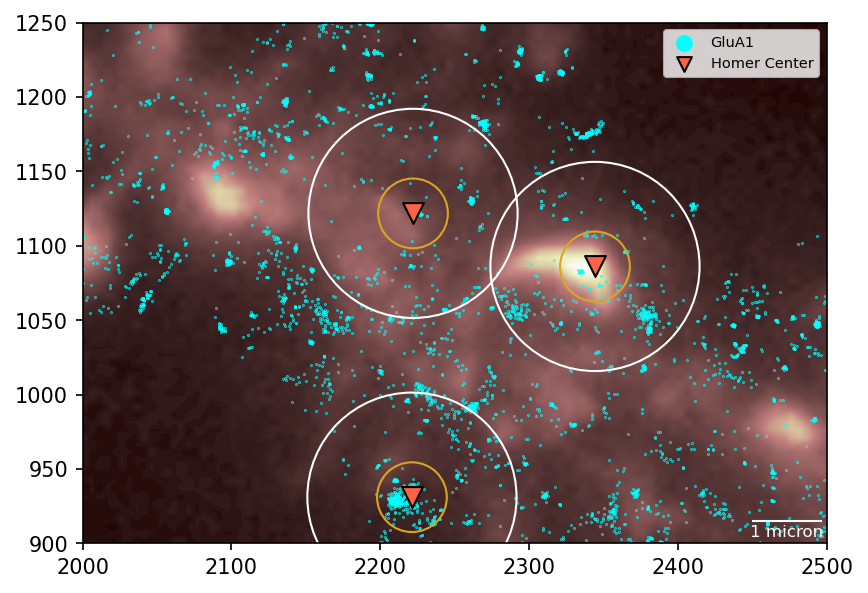

In [15]:
FOV_B.plot_region(limits=[[2000, 2500],[900, 1250]], Params=[], circle_radii=[500, 1500], 
                  show_points=['GluA1'], point_size=0.10, background_points_colors=['cyan'],
                  circle_colors=['goldenrod', 'white'], background_cmap='pink', homer_color='tomato')

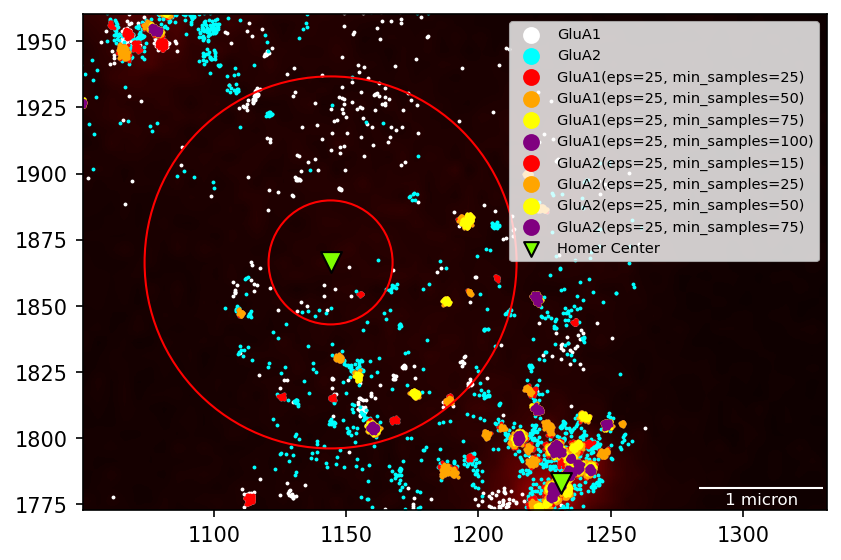

In [16]:
FOV_B.plot_homer(17, Params=Params, circle_radii=[500, 1500], show_points=['GluA1', 'GluA2'], 
                 other_homers=True)

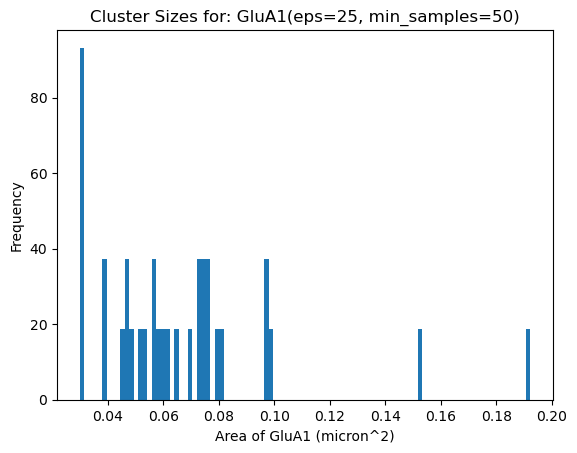

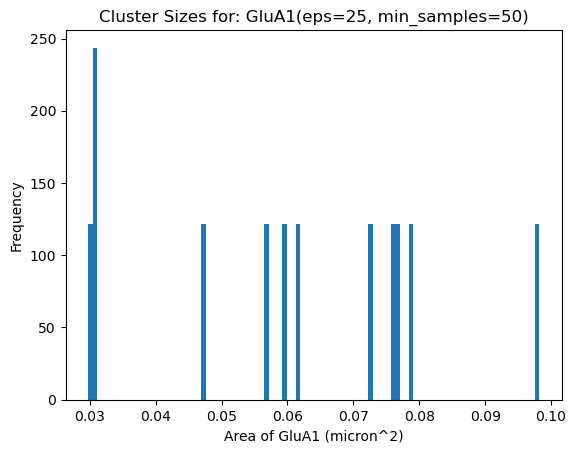

In [34]:
FOV_B.cluster_size_histogram(97.5, Params=Params[1], bins=100, max_dark_time=500, area=True, extra_FOVs=[FOV_A])
FOV_B.cluster_size_histogram(97.5, Params=Params[1], bins=100, max_dark_time=500, area=True, extra_FOVs=[])

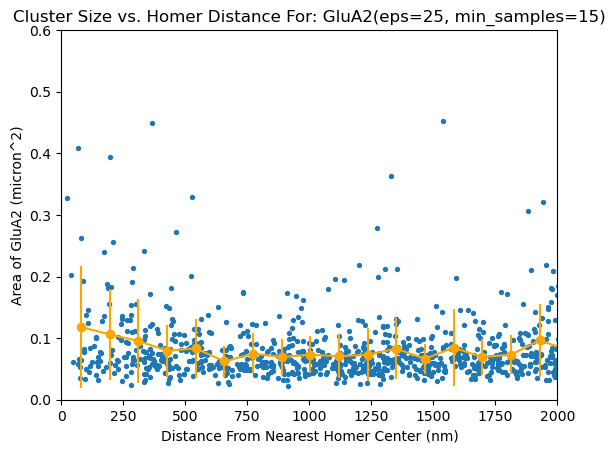

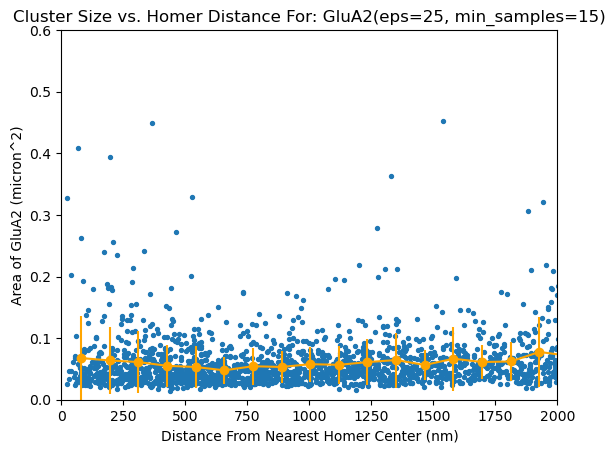

In [10]:
FOV_B.cluster_size_by_distance_to_homer_center(97.5, Params=Params[4], num_bins=150, 
                                               area=True, y_top=0.6)
FOV_B.cluster_size_by_distance_to_homer_center(97.5, Params=Params[4], num_bins=150, 
                                               area=True, y_top=0.6, extra_FOVs=[FOV_A])

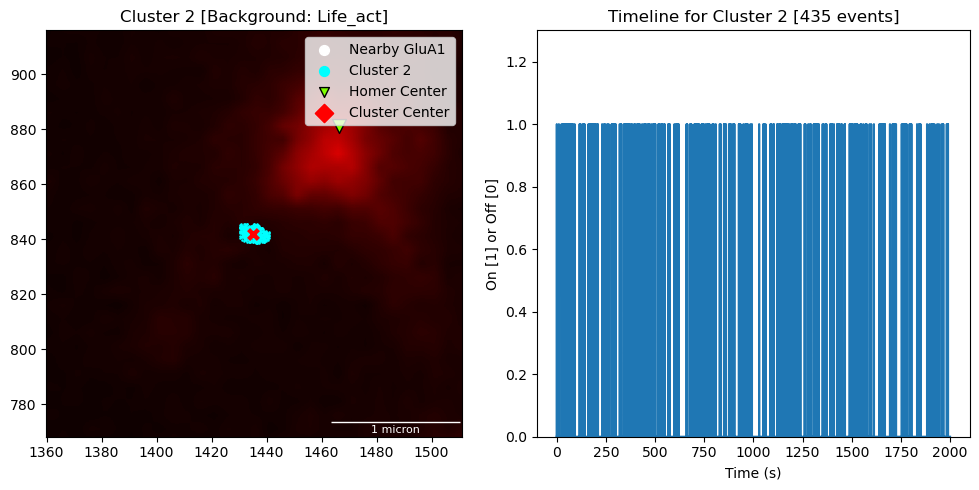

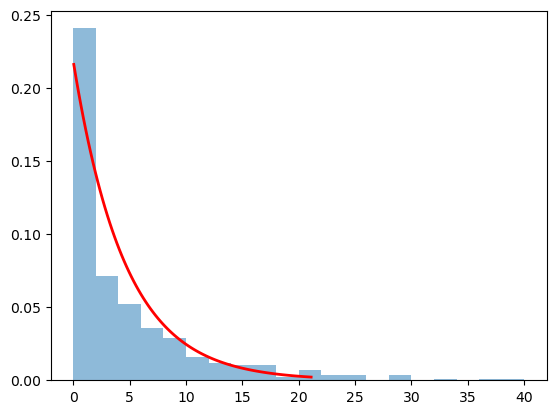

4.582027649769585

In [11]:
Param = Params[0]
cluster_index = 2
FOV_B.clustering_results[Param][cluster_index].plot(buffer=1500, nearby_points=True)
FOV_B.clustering_results[Param][cluster_index].frames.get_average_dark_time(plot=True)

In [20]:
FOV_B.write_clusters_to_csv(filename="Cluster.csv", Tau_D=97, 
                            Params=Params[0], max_dark_time=500)

Cluster.csv created successfully!
